In [1]:
#PREDICT PRICE of Airbnb in NYC 2019

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#check name of column in dataframe
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
# pick the important coloumns
coloumns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
df = df[coloumns]
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


In [6]:
df.shape # to check dimensionality of the DataFrame

(48895, 8)

In [7]:
df.info() # to prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               38843 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 3.0 MB


In [8]:
df.isnull().sum() # to check the sum of null value, based on this data we can see that the reviews per month the column with the highset null value

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df.describe(percentiles=[.10, .25, .50, .75, .90]).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.66799,40.69010,40.72307,40.763115,40.80489,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.99669,-73.98307,-73.95568,-73.936275,-73.90781,-73.71299
price,48895.0,152.720687,240.154170,0.00000,49.00000,69.00000,106.00000,175.000000,269.00000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,1.00000,3.00000,5.000000,28.00000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,0.00000,1.00000,5.00000,24.000000,70.00000,629.00000
reviews_per_month,38843.0,1.373221,1.680442,0.01000,0.06000,0.19000,0.72000,2.020000,3.63000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,1.00000,2.000000,5.00000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,0.00000,45.00000,227.000000,337.00000,365.00000


In [10]:
df.minimum_nights.median()

3.0

In [11]:
df.columns[~df.columns.isin(['latitude', 'longitude', 'price'])]

Index(['minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

C:\Users\Arief\AppData\Local\Temp/ipykernel_17716/184723480.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(layout=(1, 5), ax=ax, bins=25, column=df.columns[~df.columns.isin(['latitude', 'longitude', 'price'])])


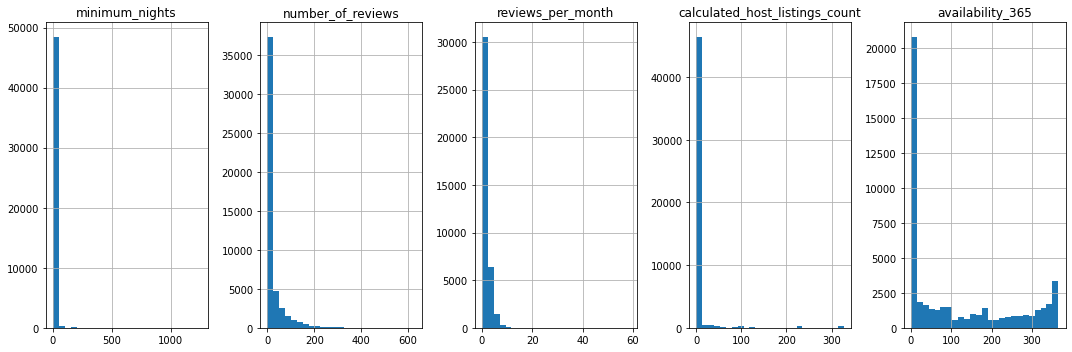

In [12]:
# distribution data independent variable 

fig = plt.figure(figsize=(15, 5))
ax = plt.gca() # get current axis
df.hist(layout=(1, 5), ax=ax, bins=25, column=df.columns[~df.columns.isin(['latitude', 'longitude', 'price'])])
plt.tight_layout()
plt.show()

C:\Users\Arief\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

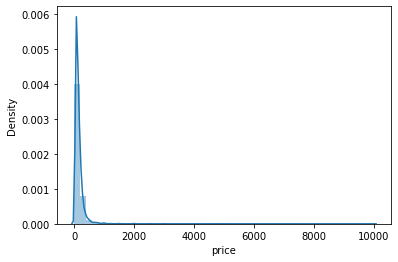

In [13]:
# check distribution data dependent variable
sns.distplot(df.price)

C:\Users\Arief\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

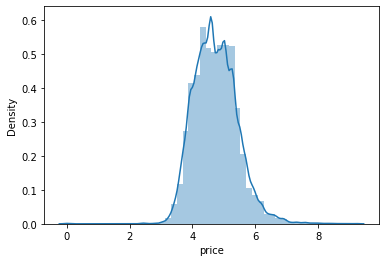

In [14]:
# the data looks skewed left not bell curved, so we need log transformation to make a distribution data to be bell curve
sns.distplot(np.log1p(df.price))

In [15]:
# the data target/dependent variable now in normal distribution

In [16]:
# DATA PREPARATION

In [17]:
# check length of data
len(df)

48895

In [18]:
n = len(df)
n_val = int(0.2 * len(df))
n_test = int(0.2 * len(df))
n_train = n - (n_val + n_test)
n, n_val, n_test, n_train 

(48895, 9779, 9779, 29337)

In [19]:
idx = np.arange(n) # generate sequence index
idx

array([    0,     1,     2, ..., 48892, 48893, 48894])

In [20]:
np.random.seed(42) # make it reproducible, 
np.random.shuffle(idx) # shuffle the index

In [21]:
df_train = df.iloc[idx[: n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train : n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train + n_val :]].reset_index(drop=True)

In [22]:
y_train = np.log1p(df_train.price) # dependent_variable trained data
y_val = np.log1p(df_val.price) # dependent_variable valuation data
y_test = np.log1p(df_test.price) # dependent_variable testing data

In [23]:
len(df_train), len(df_val), len(df_test), len(y_train), len(y_val), len(y_test)

(29337, 9779, 9779, 29337, 9779, 9779)

In [24]:
del df_train['price']
del df_val['price']
del df_test['price']

In [25]:
def X(df, fillna_value):
    
    df = df.fillna(fillna_value)
    X = df.values
    
    return X

In [26]:
# without regularization
def normal_equation(X, y):

    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = np.linalg.inv(XTX)
    w_full = XTX.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [28]:
# rmse
def rmse(y, y_pred):
    se = (y_pred - y) ** 2
    mse = se.mean()

    return np.sqrt(mse) 

In [29]:
# fill na value with 0
X_train = X(df_train, 0)
w0, w = normal_equation(X_train, y_train)

# validate our model with validation data
X_val = X(df_val, 0)
y_pred = w0 + X_val.dot(w)

np.round(rmse(y_pred, y_val), 2)

0.64

In [30]:
# fill na with mean_value
mean_value = df.reviews_per_month.mean() # because that only reviews per month that has na value in this X

X_train = X(df_train, mean_value)
w0, w = normal_equation(X_train, y_train)

# Validate model with validation data
X_val = X(df_val, mean_value)
y_pred = w0 + X_val.dot(w)

np.round(rmse(y_pred, y_val), 2)

0.64